# Red neuronal

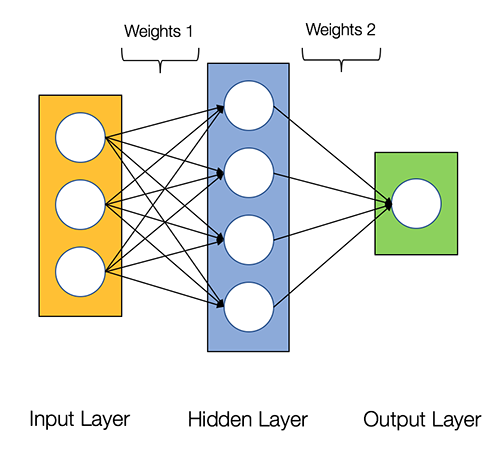

## Esquema

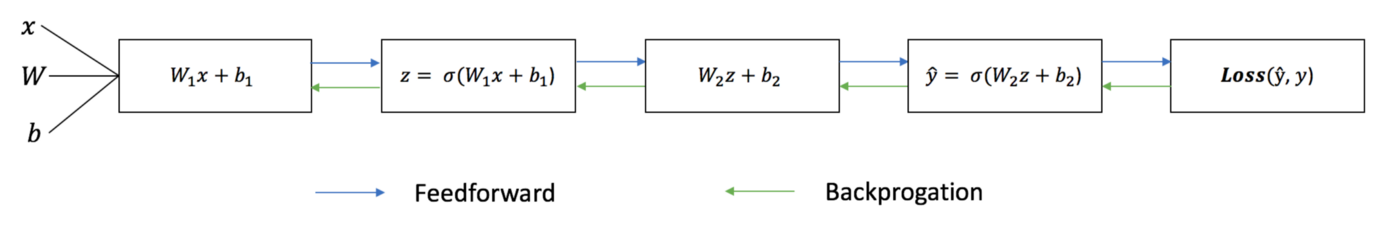

## Funcion de perdida

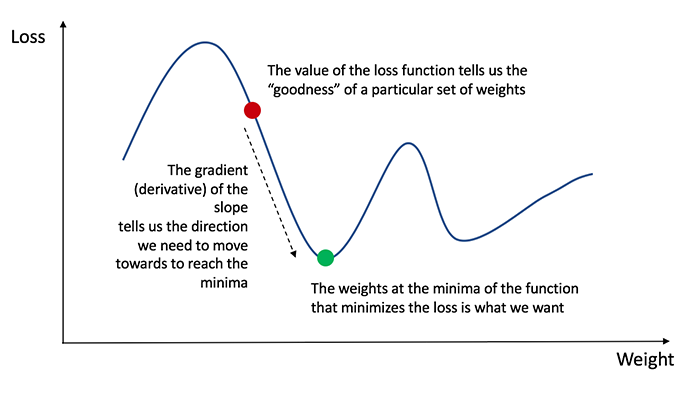

# Implementación desde 0
## Librerias y funciones auxiliares

In [1]:
import numpy as np
# Funciones matematicas
def sigmoid(t):
    return 1/(1+np.exp(-t))

def sigmoid_derivative(p):
    return p * (1 - p)

## Implementación de una red neuronal

In [2]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output 

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        self.weights1 += d_weights1
        self.weights2 += d_weights2

## Generación de datos

In [3]:
X=np.array(([0,0,1],[0,1,0],[1,0,1], [1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

print("Datos de training")
print("X:")
print(X)
print("Y: ")
print(y)

Datos de training
X:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]
 [1. 1. 1.]]
Y: 
[[0.]
 [1.]
 [1.]
 [0.]]


## Training de la red neuronal

In [4]:
NN = NeuralNetwork(X,y)
for x in range(1500): 
    NN.feedforward()
    NN.backprop()
    
print("Predicción de la red neuronal:")
print(NN.output)

Predicción de la red neuronal:
[[0.0082408 ]
 [0.97501229]
 [0.9848316 ]
 [0.02157493]]
